# Trend Engagement on TikTok:
## Regression Forecasting
- V. Brad Culbertson
- v.brad.culbertson@gmail.com
- https://www.linkedin.com/in/brad-culbertson
- https://github.com/VBradCulbertson?tab=repositories
- BrainStation, Data Science Capstone Project

In [53]:
# Basic packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Modeling packages.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# Warning handler.
import warnings
warnings.filterwarnings('ignore')

In [54]:
# https://github.com/datares/TikTok_Famous/tree/main/Analysis

In [55]:
# Read data into dataframes.
suggvids = pd.read_csv('C://Users/Victor/Documents/Data/TT/sug_users_vids_all.csv')
suggvids1 =  pd.read_csv('C://Users/Victor/Documents/Data/TT/sug_users_vids1.csv')
suggvids2 = pd.read_csv('C://Users/Victor/Documents/Data/TT/sug_users_vids2.csv')
suggvids3 = pd.read_csv('C://Users/Victor/Documents/Data/TT/sug_users_vids3.csv')
suggvids4 = pd.read_csv('C://Users/Victor/Documents/Data/TT/sug_users_vids4.csv')
suggvids5 = pd.read_csv('C://Users/Victor/Documents/Data/TT/top_users_vids.csv')

In [56]:
# Concat the dataframes after verifying shape.
dfs = [suggvids, suggvids1, suggvids2, suggvids3, suggvids4, suggvids5]

for df in dfs:
    print(f'{df.shape}.')
    
data = pd.concat(dfs)

(41702, 13).
(11921, 13).
(11903, 13).
(12677, 13).
(5201, 13).
(12559, 13).


## Data Dictionary
- **ID:** Video identification number.
- **Create Time:** Unix datetime for the upload of the video to the TikTok app.
- **User:** Creator username, no leading '@' symbol.
- **Hashtags:** Hash keywords applied to the video description to influence TikTok algorithm.
- **Song Title:** Sound applied to the video. 
- **Length:** Length of the video in seconds.
- **Likes:** Number of total likes the video received from other TikTok users.
- **Shares:** Number of times the video was shared by other TikTok users.
- **Comments:** Number of comments made on the video. 
- **Views:** Number of times the video has been viewed. 
- **Followers:** Number of TikTok users who follow the creator's account.
- **Total Likes:** Total of all likes from other users on all creator's videos.
- **Total Videos:** Total number of videos uploaded by the creator.
- **Engagement:** Sum of likes, shares, comments, and views.
- **Song Uses:** Number of times the song/sound has been used in videos within the dataset.
- **Min:** Earliest appearance of song/sound in a video.
- **Max:** Latest appearance of a song/sound in a video.
- **Window:** Duration of song/sound appearance in days.
- **Window Pos:** Position of video in the activity window as a percentage of active time.
- **Days Since Debut:** Number of days elapsed from trending song/sound's first use.
- **Engagement Rate:** Industry standard calculation (Total Engagement / Total Followers)

# Basic EDA

In [57]:
data.shape

(95963, 13)

In [58]:
data.info

<bound method DataFrame.info of                         id  create_time    user_name  \
0      6892428462015958273   1604768557  john.cena10   
1      6891790235336822018   1604619960  john.cena10   
2      6891264678832475393   1604497592  john.cena10   
3      6891050048403049730   1604447622  john.cena10   
4      6890886086613126402   1604409445  john.cena10   
...                    ...          ...          ...   
12554  6876829707153820933   1601136733       sarati   
12555  6876466118068931845   1601052092       sarati   
12556  6876456742780275973   1601049906       sarati   
12557  6876117050423594246   1600970815       sarati   
12558  6876102133977074950   1600967337       sarati   

                                                hashtags  \
0      ['johncena', 'love', 'tiktok', 'fyp', 'foryoup...   
1      ['johncena', 'love', 'tiktok', 'halloween', 'q...   
2              ['johncena', 'love', 'fyp', 'foryoupage']   
3      ['johncena', 'fyp', 'foryoupage', 'viral', 'co..

In [59]:
data.duplicated().sum()

43119

In [60]:
display(data[data.duplicated(subset = 'id')])

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
36501,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,765,2,54,4353,2000000,22400000,577
36502,6891813370060705029,1604625377,thetoiley,['balloons'],positions,21,812,4,132,5797,2000000,22400000,577
36503,6890241204957482245,1604259328,thetoiley,['duet'],The mummy,37,1955,8,97,12500,2000000,22400000,577
36504,6889052796541308165,1603982672,thetoiley,"['dinosaur', 'scary', 'chase']",original sound,8,13100,16,150,66600,2000000,22400000,577
36505,6888460558564150534,1603844741,thetoiley,['audition'],original sound,4,22500,17,429,106800,2000000,22400000,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12329,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268500000,179
12330,6875861928237927686,1600911473,sherinicolee,['duet'],Glorious (feat. Skylar Grey),15,1100000,1460,6244,5700000,12100000,268500000,179
12331,6875418939032177926,1600808248,sherinicolee,"['faceurstrength', 'ad']",thank you guys so much for using this sound,36,631100,854,4284,3700000,12100000,268500000,179
12332,6874298919354928390,1600547452,sherinicolee,['duet'],Happiest Year,10,926800,834,5604,4900000,12100000,268500000,179


In [61]:
# Verify duplication using sample record.
data[data['id']==6892139103526096134]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
36476,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,764,2,54,4348,2000000,22400000,577
36501,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,765,2,54,4353,2000000,22400000,577
12652,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,764,2,54,4348,2000000,22400000,577
0,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,765,2,54,4353,2000000,22400000,577


In [62]:
# Secondary verification.
data[data['id']==6877624911511293190]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
22149,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268600000,179
10228,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268600000,179
12329,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268500000,179


It appears that the data pull (done in repetition) resulted in copies of the same video data at different times resulting in slightly different values in likes/shares/comments. These do in fact appear to be duplicate records and will be removed.

In [63]:
# Drop dupicate records.
data.drop_duplicates(keep = 'first', inplace = True)

No columns appear to contain duplicated information.

In [64]:
data.dtypes

id                int64
create_time       int64
user_name        object
hashtags         object
song             object
video_length      int64
n_likes           int64
n_shares          int64
n_comments        int64
n_plays           int64
n_followers       int64
n_total_likes     int64
n_total_vids      int64
dtype: object

'id' is an integer and is appropriate for its implementation. 'create_time' is integer, but doesn't seem appropriate and will be explored. Three object types exist in the dataset: user_name, hashtags, and song. 'Video_length' is measured in seconds; integer dtype is appropriate. All features beginning with 'n_' are counts; integer dtype is appropriate.

In [65]:
# Prettify column names.
data.rename(columns={'id': 'ID',
                    'create_time': 'Create Time',
                    'user_name': 'User',
                    'hashtags': 'Hashtags',
                    'song': 'Song Title',
                    'video_length': 'Length',
                    'n_likes': 'Likes',
                    'n_shares': 'Shares',
                    'n_comments': 'Comments',
                    'n_plays': 'Views',
                    'n_followers': 'Followers',
                    'n_total_likes': 'Total Likes',
                    'n_total_vids': 'Total Videos'}, inplace = True)

In [66]:
# Convert unix datetime to standard datetime format.
data['Create Time'] = pd.to_datetime(data['Create Time'], unit = 's')

In [67]:
# Verify.
data.head(3)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos
0,6892428462015958273,2020-11-07 17:02:37,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,2020-11-05 23:46:00,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,2020-11-04 13:46:32,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211


In [68]:
# Calculate total engagement and engagement rate.
data['Engagement'] = data['Likes'] + data['Shares'] + data['Comments'] + data['Views']
# Previous exploration resulted in infinite values of Engagment Rate. I've elected to resolve 
# this by setting Engagement Rate to 0 for any User with 0 followers.
# The industry standard in social media is used below for the calculation of Engagement Rate's numerator.
data['Engagement Rate'] = np.where(data['Followers'] == 0, 0, ((data['Likes'] + data['Shares'] + data['Comments']) / data['Followers']))

In [69]:
# Verify no inifinites.
data['Engagement Rate'].describe()

count    52844.000000
mean         0.067889
std          0.202538
min          0.000000
25%          0.009068
50%          0.023812
75%          0.060788
max         14.970815
Name: Engagement Rate, dtype: float64

Research indicates that a 14% engagement rate is 'good' by TikTok's reported metrics. The vast majority of users being below this threshold may indeed be an accurate representation of the population from a common sense sanity check.

In [70]:
data.corr()

,ID,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate
ID,1.000000,0.011318,-0.020152,-0.008503,-0.026243,-0.029598,0.015180,0.029676,0.043540,-0.029072,-0.022886
Length,0.011318,1.000000,-0.006279,0.014637,-0.010003,-0.021415,-0.031391,-0.041222,-0.027166,-0.020108,0.009968
Likes,-0.020152,-0.006279,1.000000,0.630997,0.576278,0.835602,0.471758,0.351872,-0.018079,0.866078,0.322173
Shares,-0.008503,0.014637,0.630997,1.000000,0.504672,0.585761,0.187448,0.131392,-0.026770,0.601233,0.271092
Comments,-0.026243,-0.010003,0.576278,0.504672,1.000000,0.580293,0.270723,0.243867,-0.004867,0.590580,0.223565
Views,-0.029598,-0.021415,0.835602,0.585761,0.580293,1.000000,0.364658,0.237333,-0.030040,0.998311,0.316597
Followers,0.015180,-0.031391,0.471758,0.187448,0.270723,0.364658,1.000000,0.818261,0.384827,0.381491,-0.062234
Total Likes,0.029676,-0.041222,0.351872,0.131392,0.243867,0.237333,0.818261,1.000000,0.525748,0.253117,-0.058561
Total Videos,0.043540,-0.027166,-0.018079,-0.026770,-0.004867,-0.030040,0.384827,0.525748,1.000000,-0.029252,-0.142038
Engagement,-0.029072,-0.020108,0.866078,0.601233,0.590580,0.998311,0.381491,0.253117,-0.029252,1.000000,0.322323


- Unsurprising correlations between Views, Likes/Shares/Comments. 
- Surprising low correlation between Followers and Views.
- Surprising low of correlation between Followers and Likes/Shares/Comments.


# Exploring Song/Sound Feature

In [71]:
data.groupby(['Song Title']).mean().sort_values(by = 'Views', ascending = False)

,ID,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate
Song Title,,,,,,,,,,,
Kill Em With Kindness,9.944372e+16,15.0,15700000.0,62400.0,957100.0,202800000.0,25500000.0,67300000.0,24.0,219519500.0,0.655667
original sound - Rowhi Rai,6.792912e+18,55.0,3400000.0,44900.0,8766.0,191800000.0,17300000.0,145200000.0,140.0,195253666.0,0.199634
bestfriendscheck,6.768158e+18,12.0,22400000.0,412200.0,157000.0,168600000.0,29500000.0,160200000.0,30.0,191569200.0,0.778617
Spence's original sound,6.716138e+18,14.0,7400000.0,107500.0,60900.0,116000000.0,13600000.0,84800000.0,61.0,123568400.0,0.556500
Nimbu Ko Kaise Toddoge??🤫,6.789964e+18,14.0,5900000.0,114400.0,7226.0,107300000.0,8800000.0,97100000.0,108.0,113321626.0,0.684276
...,...,...,...,...,...,...,...,...,...,...,...
You Lost Me,6.891491e+18,19.0,9.0,0.0,0.0,38.0,77200.0,889300.0,1366.0,47.0,0.000117
feel something,6.892153e+18,4.0,4.0,0.0,4.0,34.0,8370.0,24300.0,111.0,42.0,0.000956
Amigos Especiales,6.891857e+18,7.0,6.0,0.0,2.0,26.0,8370.0,24300.0,111.0,34.0,0.000956


In [72]:
n_uses = data['Song Title'].value_counts()

In [73]:
n_uses[n_uses >= 20]

original sound                             23892
sonido original                             3091
оригинальный звук                            843
som original                                 731
Originalton                                  336
                                           ...  
Clatter                                       20
เสียงต้นฉบับ - lalalalisa_m97                 20
Dream Girl                                    20
STOP MAKING THIRST TRAPS WITH MY AUDIO.       20
original sound - HowToBasic                   20
Name: Song Title, Length: 160, dtype: int64

In [74]:
# Filter for songs used more than 25 times.
hot_songs = data[data['Song Title'].isin(n_uses[n_uses >= 20].index)]

In [75]:
# Add column for number of uses for each song in filtered df.
hot_songs['Song Uses'] = hot_songs['Song Title'].map(hot_songs['Song Title'].value_counts())

In [76]:
hot_songs['Song Title'].value_counts()

original sound                             23892
sonido original                             3091
оригинальный звук                            843
som original                                 731
Originalton                                  336
                                           ...  
เสียงต้นฉบับ - lalalalisa_m97                 20
Say So                                        20
Cradles                                       20
STOP MAKING THIRST TRAPS WITH MY AUDIO.       20
Killing Me Softly With His Song (Remix)       20
Name: Song Title, Length: 160, dtype: int64

In [77]:
# Check.
hot_songs.sample(4)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses
32107,6890236843506322693,2020-11-01 19:18:36,brat,['fyp'],original sound,15,35900,82,410,154600,1500000,44000000,349,190992,0.024261,23892
26340,6892540172815191302,2020-11-08 00:16:37,topperguild,[],original sound,39,22000,38,257,104900,18900000,564900000,1029,127195,0.001180,23892
39368,6892396973249367298,2020-11-07 15:00:25,jannatlailma.07,"['jannatlailma', 'ayaanzubair12', 'followme', ...",orijinal ses,14,1053,2,4,9703,49300,655500,824,10762,0.021481,190
21380,6891185047752150277,2020-11-04 08:42:16,cassie,[],original sound,48,29100,41,858,86200,2600000,93000000,483,116199,0.011538,23892


In [78]:
# Create df for window calculation, grouped by song/sound.
windows = hot_songs.groupby('Song Title')['Create Time'].agg(Min = 'min',
                              Max = 'max').reset_index()

In [79]:
# Calculate the window of activity for each song/sound.
delta = windows['Max'] - windows['Min']
windows['Window'] = delta.dt.days

In [80]:
windows.head()

,Song Title,Min,Max,Window
0,2 on Tinashe slowed and reverb,2020-09-26 20:19:10,2020-11-04 18:17:26,38
1,A Moment Apart - ODESZA,2020-06-23 21:04:49,2020-11-01 20:38:33,130
2,Adderall (Corvette Corvette),2020-10-28 01:08:21,2020-11-08 01:11:27,11
3,All TikTok Mashup (JVKE - Upside Down),2020-08-01 00:36:09,2020-11-03 17:31:28,94
4,BOO By Championxiii among us UNRELEASED,2020-10-27 18:01:33,2020-11-06 15:13:13,9


In [81]:
# Check.
windows['Window'].mean()

115.20625

The average usage for trending song/sounds is 115 days. This duration of use seems long. Most trending song/sounds don't last 4 months from the anecdotal experience of this researcher.

In [82]:
# Add the fields to the original df by merging.
hot_songs = pd.merge(hot_songs, windows)
hot_songs.sample(5)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window
5274,6892397586293017857,2020-11-07 15:02:48,harrisali_01,"['team_ash', 'viraltribe']",original sound,16,24600,62,222,149900,4900000,216400000,2372,174784,0.005078,23892,2015-12-01 13:31:05,2020-11-08 01:52:50,1803
17635,6792996511358668037,2020-02-13 18:15:51,fearfactormtv,"['challenge', 'ostrich', 'faceyourfear', 'chao...",original sound,23,120800,312,171,753200,1300000,17100000,46,874483,0.093295,23892,2015-12-01 13:31:05,2020-11-08 01:52:50,1803
926,6887148847231995138,2020-10-24 11:35:01,mikhail_litvin,[],оригинальный звук,26,231900,2217,4661,1100000,3500000,30300000,149,1338778,0.068222,843,2019-10-26 20:38:05,2020-11-08 01:48:19,378
2750,6888602949669391618,2020-10-28 09:37:41,dior,"['MariaGraziaChiuri', 'Cruise21']",original sound,6,1833,1,18,13700,451300,3500000,142,15552,0.004104,23892,2015-12-01 13:31:05,2020-11-08 01:52:50,1803
4738,6891815197510536453,2020-11-06 01:23:22,thereal_tati,[],original sound,13,211700,114,1006,723800,4500000,251300000,1597,936620,0.047293,23892,2015-12-01 13:31:05,2020-11-08 01:52:50,1803


In [83]:
# Calculate position in window.
hot_songs['Window Pos'] = ((hot_songs['Create Time'] - hot_songs['Min']) / (hot_songs['Max'] - hot_songs['Min'])) * 100

In [84]:
# Calculate number of days since the Song/Sound originally appeared in a video.
hot_songs['Days Since Debut'] = hot_songs.groupby('Song Title')['Create Time'].transform(lambda x: (x-x.min()).dt.days)

In [85]:
# Verify.
hot_songs[hot_songs['Song Title'] == 'Spooky, Scary Skeletons'].sort_values('Days Since Debut', ascending = True)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut
33854,6753669548739677446,2019-10-30 18:47:14,willsmith,[],"Spooky, Scary Skeletons",16,4700000,68800,21300,30200000,...,210300000,51,34990100,0.116832,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,0.000000,0
33860,6877179125308722434,2020-09-27 14:47:24,neffatibrothers,['spookyseason'],"Spooky, Scary Skeletons",10,702500,1163,1363,5300000,...,313200000,653,6005026,0.057789,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,88.961879,332
33824,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,53100000,67,4558343,0.225880,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333
33859,6878756639449632001,2020-10-01 20:48:59,neffatibrothers,[],"Spooky, Scary Skeletons",11,214600,405,543,1100000,...,313200000,653,1315548,0.017668,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.098141,337
33847,6879064741982031105,2020-10-02 16:44:34,annamcnulty,"['halloween', 'flexible', 'spooky']","Spooky, Scary Skeletons",11,385600,4461,3616,2000000,...,95900000,194,2393677,0.075707,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.320059,337
33866,6880959294519414021,2020-10-07 19:16:58,sarati,['sarati'],"Spooky, Scary Skeletons",11,137900,697,1017,1400000,...,260100000,1418,1539614,0.015342,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,91.684780,343
33863,6883864679626607873,2020-10-15 15:10:45,marioaguilar,['marioaguilar'],"Spooky, Scary Skeletons",11,361700,357,703,2100000,...,155900000,462,2462760,0.033589,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,93.777370,350
33850,6883581763529051398,2020-10-14 20:53:34,stoveskitchen,['TimeWarpScan'],"Spooky, Scary Skeletons",12,11000,24,105,78800,...,8500000,156,89929,0.011261,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,93.573715,350
33844,6884176991520673026,2020-10-16 11:22:43,homuraham,"['spookyseason', 'hamster', 'hamsters', 'homur...","Spooky, Scary Skeletons",11,6922,102,50,48400,...,28500000,104,55474,0.002721,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.002330,351
33862,6884334288263859458,2020-10-16 21:33:06,marioaguilar,[],"Spooky, Scary Skeletons",11,118800,101,291,674900,...,155900000,462,794092,0.011036,49,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.115626,352


In [86]:
# Sanity check.
hot_songs['Window Pos'].mean()

87.43587078214617

This value implies that most of the videos for each sound are created near the end of the activity window. What might be influencing this mean position?

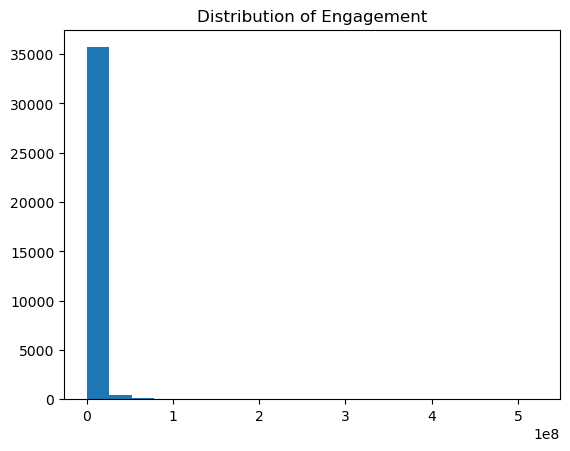

In [87]:
plt.figure()
plt.hist(hot_songs['Engagement'], bins = 20)
plt.title('Distribution of Engagement')
plt.show()

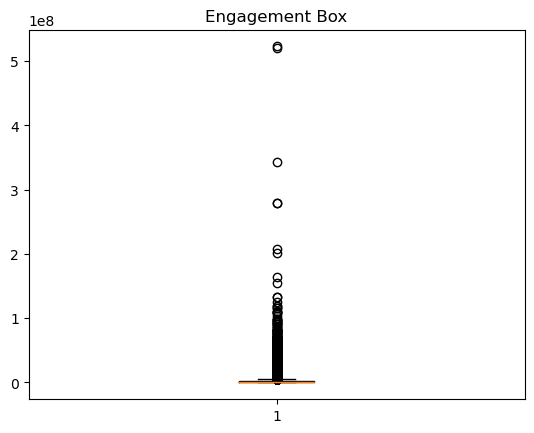

In [88]:
plt.figure()
plt.boxplot(hot_songs['Engagement'])
plt.title('Engagement Box')
plt.show()

The distribution is severely skewed, likely influenced by the size of the outliers regarding engagement.

In [89]:
hot_songs.shape

(36241, 21)

In [90]:
# Filtering out some of the outliers with greatest influence over distribution.
hot_songs = hot_songs[hot_songs['Engagement'] <= 5000000]

In [91]:
hot_songs.shape

(31771, 21)

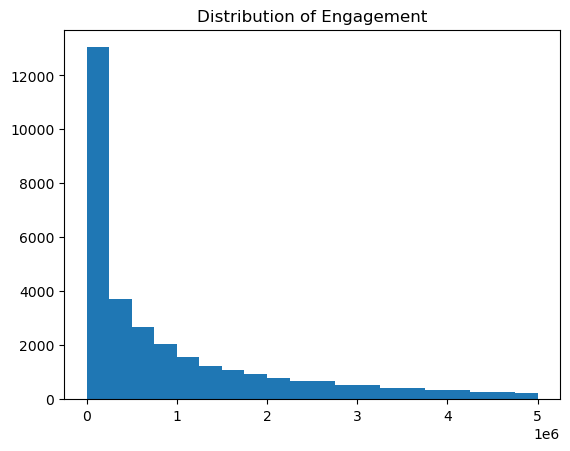

In [92]:
plt.figure()
plt.hist(hot_songs['Engagement'], bins = 20)
plt.title('Distribution of Engagement')
plt.show()

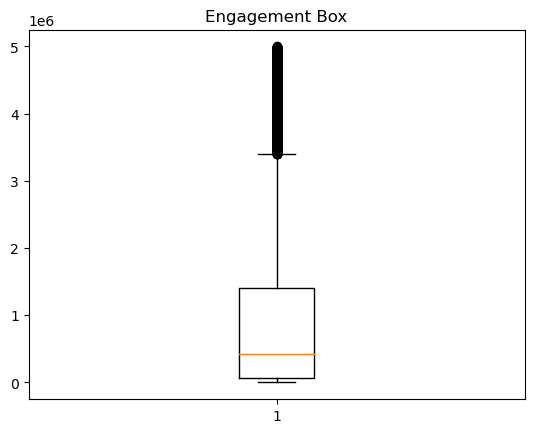

In [93]:
plt.figure()
plt.boxplot(hot_songs['Engagement'])
plt.title('Engagement Box')
plt.show()

Filtering has improved the distributions and means slightly. The data remains heavily skewed.

# Remove "Original Sound"

"Original Sound" means there was no audio track added other than the creator's voice. These are single-instance sounds that should not be included in this analysis. So they'll be removed. 

In [94]:
# Observed instances of "Original Sound" used as Song Title (varied languages).
orig_sounds = ['original sound', 'sonido original', 'som original', 'Originalton',
               'Original Sound', 'orijinal ses', 'son original', 'оригинальный звук']

In [95]:
# Subset the df to remove "original sound" song titles.
no_orig = hot_songs[~hot_songs['Song Title'].isin(orig_sounds)]

In [96]:
# Sanity check.
no_orig['Window Pos'].mean()

58.945592895108504

Removing single-date video ranges has provided a more realistic window position mean.

In [97]:
# Update count of song uses after filtering by engagement.
# Lambda function used to demonstrate the skill.
no_orig['Song Uses'] = no_orig['Song Title'].apply(lambda x: (no_orig['Song Title'] == x).sum())

In [98]:
no_orig.head()

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut
0,6892428462015958273,2020-11-07 17:02:37,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,...,4700000,211,14805,0.002005,308,2020-02-20 15:56:03,2020-11-08 00:18:38,261,99.884144,261
1,6891790235336822018,2020-11-05 23:46:00,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,...,4700000,211,60232,0.007432,308,2020-02-20 15:56:03,2020-11-08 00:18:38,261,99.226069,259
2,6891050048403049730,2020-11-03 23:53:42,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,...,4700000,211,59161,0.007961,308,2020-02-20 15:56:03,2020-11-08 00:18:38,261,98.462854,257
3,6890886086613126402,2020-11-03 13:17:25,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,...,4700000,211,27952,0.003252,308,2020-02-20 15:56:03,2020-11-08 00:18:38,261,98.293784,256
4,6890500322096123137,2020-11-02 12:20:27,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral', 'co...",الصوت الأصلي,23,8021,24,54,49600,...,4700000,211,57699,0.008099,308,2020-02-20 15:56:03,2020-11-08 00:18:38,261,97.896017,255


In [99]:
# Calculate a new feature counting the number of times a song has been used prior to the current record's date.
no_orig['Song Uses To Date'] = no_orig.groupby((no_orig['Song Title'] != no_orig['Song Title'].shift(1)).cumsum()).cumcount()+1

In [100]:
# Validation 1.
no_orig[no_orig['Song Title'] == 'Spooky, Scary Skeletons'].sort_values('Days Since Debut', ascending = True)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut,Song Uses To Date
33824,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,67,4558343,0.225880,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333,7
33847,6879064741982031105,2020-10-02 16:44:34,annamcnulty,"['halloween', 'flexible', 'spooky']","Spooky, Scary Skeletons",11,385600,4461,3616,2000000,...,194,2393677,0.075707,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.320059,337,28
33859,6878756639449632001,2020-10-01 20:48:59,neffatibrothers,[],"Spooky, Scary Skeletons",11,214600,405,543,1100000,...,653,1315548,0.017668,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.098141,337,38
33866,6880959294519414021,2020-10-07 19:16:58,sarati,['sarati'],"Spooky, Scary Skeletons",11,137900,697,1017,1400000,...,1418,1539614,0.015342,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,91.684780,343,43
33850,6883581763529051398,2020-10-14 20:53:34,stoveskitchen,['TimeWarpScan'],"Spooky, Scary Skeletons",12,11000,24,105,78800,...,156,89929,0.011261,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,93.573715,350,31
33863,6883864679626607873,2020-10-15 15:10:45,marioaguilar,['marioaguilar'],"Spooky, Scary Skeletons",11,361700,357,703,2100000,...,462,2462760,0.033589,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,93.777370,350,41
33844,6884176991520673026,2020-10-16 11:22:43,homuraham,"['spookyseason', 'hamster', 'hamsters', 'homur...","Spooky, Scary Skeletons",11,6922,102,50,48400,...,104,55474,0.002721,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.002330,351,25
33858,6884599838911008002,2020-10-17 14:43:34,neffatibrothers,['TimeWarpScan'],"Spooky, Scary Skeletons",9,102600,223,335,1000000,...,653,1103158,0.008456,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.306897,352,37
33862,6884334288263859458,2020-10-16 21:33:06,marioaguilar,[],"Spooky, Scary Skeletons",11,118800,101,291,674900,...,462,794092,0.011036,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.115626,352,40
33839,6884599838911008002,2020-10-17 14:43:34,neffatibrothers,['TimeWarpScan'],"Spooky, Scary Skeletons",9,102700,223,335,1000000,...,653,1103258,0.008464,43,2019-10-30 18:47:14,2020-11-07 21:55:02,374,94.306897,352,20


In [101]:
# Validation 2.
no_orig[no_orig['Song Title'] == "Heart Don't Stand a Chance"]

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut,Song Uses To Date
30796,6882552014010666246,2020-10-12 02:17:29,marcusolin,[],Heart Don't Stand a Chance,8,239100,246,609,1400000,...,792,1639955,0.020866,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,58.118904,34,1
30797,6870321980306885894,2020-09-09 03:18:22,mackzmusic,[],Heart Don't Stand a Chance,8,172300,316,744,723100,...,25,896460,0.157600,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,2.052214,1,2
30798,6877288162763230469,2020-09-27 21:51:06,babyariel,[],Heart Don't Stand a Chance,8,510200,851,2981,2700000,...,2291,3214032,0.014771,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,33.987824,19,3
30799,6891687651921988869,2020-11-05 17:08:50,markellwashington1,[],Heart Don't Stand a Chance,8,64600,49,205,287400,...,826,352254,0.015441,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,100.000000,58,4
30801,6870676305705192710,2020-09-10 02:13:20,just_addison_xd,[],Heart Don't Stand a Chance,8,291200,1565,3740,1300000,...,40,1596505,0.080136,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,3.676556,2,5
30802,6877514110922280197,2020-09-28 12:30:17,nytonystark,"['duet', 'catsoftiktok', 'pumpkin', 'holloween...",Heart Don't Stand a Chance,8,14500,37,218,179200,...,369,193955,0.003599,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,35.026464,20,6
30803,6871804809859697925,2020-09-13 03:12:28,andrew.davila,[],Heart Don't Stand a Chance,8,193100,767,1716,1100000,...,161,1295583,0.045484,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,8.849924,5,7
30804,6890693435833994497,2020-11-03 00:49:52,gemelasortega,[],Heart Don't Stand a Chance,7,176400,55,405,580100,...,540,756960,0.031028,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,95.441140,56,8
30805,6887421761705577729,2020-10-25 05:14:04,elyblancarte,[],Heart Don't Stand a Chance,8,291200,81,592,1900000,...,203,2191873,0.066335,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,80.442726,47,9
30806,6889196380187790594,2020-10-30 00:00:31,alejandroflrs14,[],Heart Don't Stand a Chance,8,97900,45,212,458100,...,192,556257,0.023941,23,2020-09-07 22:21:13,2020-11-05 17:08:50,58,88.578158,52,10


Text(0, 0.5, 'Video Count')

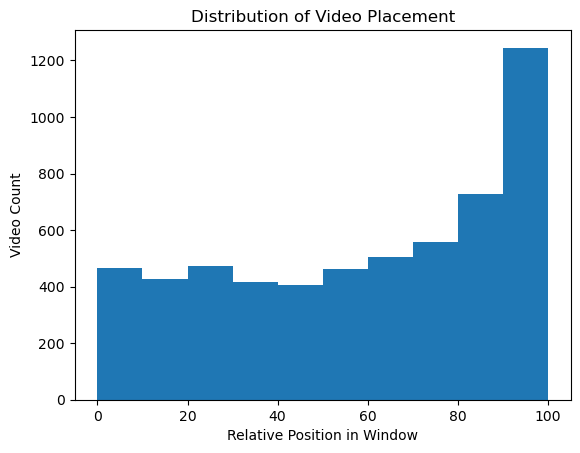

In [150]:
# Visualize Window Position distribution.
plt.figure()
plt.hist(no_orig['Window Pos'])
plt.title('Distribution of Video Placement')
plt.xlabel('Relative Position in Window')
plt.ylabel('Video Count')



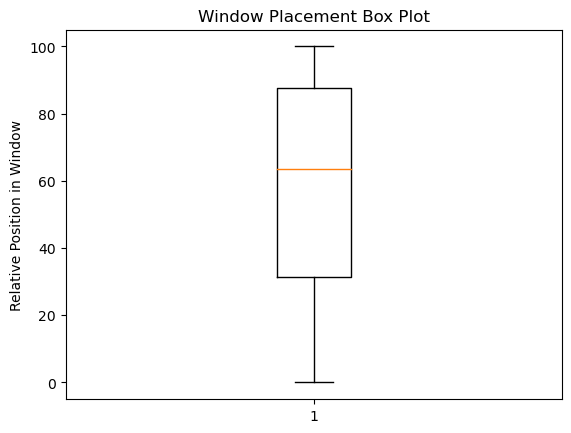

In [149]:
# Boxplot of Window Position.
plt.figure()
plt.boxplot(no_orig['Window Pos'])
plt.title('Window Placement Box Plot')
plt.ylabel('Relative Position in Window')
plt.show()

In [144]:
# Plot Engagement over trend window.
fig = px.scatter(no_orig, 
                 x = "Days Since Debut", 
                 y = "Engagement", 
                 trendline = "lowess", 
                 trendline_options = dict(frac = .5),
                 trendline_color_override = 'red',
                 title="Engagement Over Window Position")
fig.show()

- Expected engagement decay over time.
- What's happening in the clearly defined bands?

# Binarize Song Titles & Hashtags

In [104]:
# Import and instantiate the binarizer (one-hot encoder).
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output = True)

In [105]:
# Create dataframe with binarized Hashtags.
no_orig_hashtags = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Hashtags'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_h')

In [106]:
# Create dataframe with binarized Song Title.
no_orig_songs = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Song Title'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_s')

In [107]:
# Create dataframes containing binarized Song Title & Hashtags.
no_orig_both = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Hashtags'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_h')

no_orig_both = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Song Title'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_s')

In [108]:
X_neither = no_orig.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                    'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                    'Comments', 'Shares', 'Window', 'Window Pos', 'Engagement Rate',
                                    'Engagement'])
y_neither = no_orig['Engagement']

Early model evaluation lent some support to the following hypotheses:
- Excluding binarized song titles has no impect on model performance (R2 error).
- Excluding binarized hashtags has no impact on model performance (R2 error).

Initial models will be run with neither song titles, nor hashtags binarized.

# Train/Test Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# Reserve test data.
X_remainder, X_test, y_remainder, y_test = train_test_split(X_neither, y_neither, test_size = .25, random_state = 42)

# Set aside validation data.
X_train, X_validation, y_train, y_validation = train_test_split(X_neither, y_neither, test_size = .25, random_state = 42)

## Scaling

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

## Linear Regression

In [112]:
my_lin = LinearRegression()
my_lin_results = my_lin.fit(X_train, y_train)
my_lin_results

my_lin.predict(X_validation)

print(my_lin.score(X_train, y_train))
my_lin.score(X_validation, y_validation)

0.2670887697255535


0.2514599516872287

In [115]:
# Collect coefficients (betas).
coefs = pd.DataFrame(zip(X_neither.columns, my_lin.coef_))

In [116]:
coefs.sort_values(by = [1], ascending = False)

,0,1
1,Followers,659703.018444
2,Total Likes,69119.568311
0,Length,29125.071767
5,Song Uses To Date,-33971.058168
4,Days Since Debut,-72114.976522
3,Total Videos,-180560.742882


# Decision Tree Regression

In [117]:
accs = pd.DataFrame(columns = ['Depth', 'Accuracy'])

for d in range(1,20):
    

    my_tree = DecisionTreeRegressor(max_depth = d) # Instantiate.
    tree_mod = my_tree.fit(X_train, y_train) # Fit.
    my_tree.predict(X_validation) # Predict.
    my_tree.score(X_validation, y_validation) # Score.
    
    accs.loc[len(accs)] = [d, my_tree.score(X_validation, y_validation)] # Append scores to df.

best = accs['Accuracy'].max()
print(f'Best model accuracy is : {best}.')


Best model accuracy is : 0.4513739452260923.


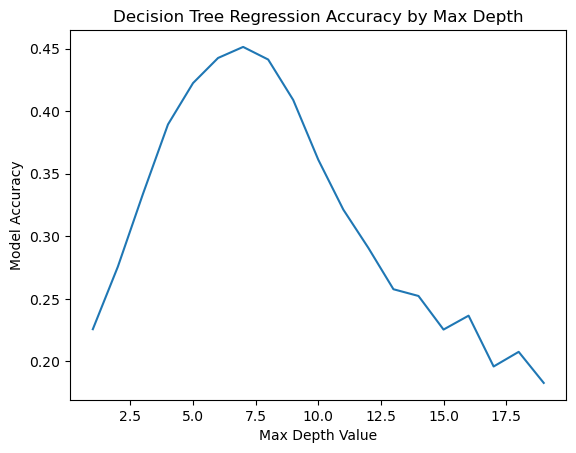

In [118]:
plt.figure()
plt.plot(accs['Depth'], accs['Accuracy'])
plt.title('Decision Tree Regression Accuracy by Max Depth')
plt.xlabel('Max Depth Value')
plt.ylabel('Model Accuracy')
plt.show()

In [119]:
accs[accs['Accuracy'] == accs['Accuracy'].max()]

,Depth,Accuracy
6,7.0,0.451374


Prediction accuracy has improved from 25% (Linear Regression)

to 45% (Decision Tree Regression, max depth = 7).

Continuing down the DTR path to a Random Forest Regression model may further improve accuracy.

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor

my_random_forest = RandomForestRegressor()
my_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))
    
print("Performance on Train data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train, y_train)}")

Performance on Train data:
Average Decision Tree: 0.6491957722538503
Random Forest: 0.9305963555998524


In [122]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_validation, y_validation))

print("Performance on Validation data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_validation, y_validation)}")

Performance on Validation data:
Average Decision Tree: 0.10010254420254115
Random Forest: 0.571944174576313


Best performance in the random forest modeling yields .58 R2 on predictions of unseen data.

# Developing a Simple Neural Network

In [123]:
from sklearn.neural_network import MLPRegressor

In [124]:
# Fitting the multi-layer regressor.
regr = MLPRegressor(random_state=42, hidden_layer_sizes = (30, 20, 10, 10, 10, 5), max_iter=1000, solver = 'adam').fit(X_train, y_train)

regr.predict(X_validation)

print(regr.score(X_validation, y_validation))


0.389519108644128


# TensorFlow Neural Network Modeling

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

# Random seeds for reproducibility.
tf.random.set_seed(42)

# Create a new sequential model.
model = keras.Sequential()

# Declare the hidden layers.
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer.
model.add(layers.Dense(1, activation = 'relu'))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.mae,
    metrics=['mae']
)

history = model.fit(X_train, y_train, epochs = 100, verbose = 0)


In [126]:
y_pred = model.predict(X_validation)

45/45 [==============================] - 0s 1ms/step


In [127]:
r2_score(y_validation, y_pred)

-0.8050863313146179

In [128]:
train_accuracy = history.history['mae'][-1]
result = model.evaluate(X_validation, y_validation, verbose = 0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {result[1]:.4f}')

Train Accuracy: 1142394.2500
Test Accuracy: 1114905.7500


# X_set Hypothesis Evaluation
- Does the inclusion of binarized Song Titles, Hashtags, combination of the two, or exclusion of both have any effect on $R^{2}$ error metrics for model performance?
- The following iterator was run to compare $R^{2}$ values across the models and X_sets.

In [129]:
# Feature Set: With both Song Title and Hashtags binarized.
X_with_song_and_hashtags = no_orig_both.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title',
                                                        'Hashtags', 'Create Time', 'Min', 'Views',
                                                        'Max', 'Likes', 'Comments', 'Shares', 'Window',
                                                        'Window Pos', 'Engagement Rate', 'Engagement'])
y_with_song_and_hashtags = no_orig_both['Engagement']

In [130]:
# Feature Set: With Song Title binarized.
X_with_songs = no_orig_songs.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                             'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                             'Comments', 'Shares', 'Window', 'Window Pos',
                                             'Engagement Rate', 'Engagement'])
y_with_songs = no_orig_songs['Engagement']

In [131]:
# Feature Set: With Hashtags binarized.
X_with_hashtags = no_orig_hashtags.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                                   'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                                   'Comments', 'Shares', 'Window', 'Window Pos',
                                                   'Engagement Rate', 'Engagement'])
y_with_hashtags = no_orig_hashtags['Engagement']

In [132]:
# Feature Set: Excluding both Song Titles and Hashtags.
X_neither = no_orig.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                    'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                    'Comments', 'Shares', 'Window', 'Window Pos', 'Engagement Rate',
                                    'Engagement'])
y_neither = no_orig['Engagement']

In [133]:
# Create iterable list of X and y sets.
X_set = {'X With Songs and Hashes': X_with_song_and_hashtags,
         'X With Songs': X_with_songs,
         'X With Hashes': X_with_hashtags,
         'X Alone': X_neither}
y_set = {'y With Songs and Hashes': y_with_song_and_hashtags,
         'y With Songs': y_with_songs,
         'y With Hashes': y_with_hashtags,
         'y Alone': y_neither}

# Results Collector

In [134]:
# Create the empty container.
model_results = pd.DataFrame(columns = ['Feature Set', 'Model', 'R2 Accuracy'])

# Model Iteration over X/Y Sets

In [135]:
# Import statements for models.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor

In [136]:
ctr = 0 #Counter to leverage for list indexing.

for X in X_set.values():
    sets = ['With Song & Hashtags', 'With Song', 'With Hashtags', 'Neither'] 
    y =  list(y_set.values())[ctr]        
    
    # Train, validation, test split.
    X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = .25, random_state = 42)
    # Scaling: instantiate scaler, fit, transform train and validation.
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_validation = scaler.transform(X_validation)
    
    # Linear Regression Model: instantiate, fit, predict.
    my_lin = LinearRegression()
    my_lin_results = my_lin.fit(X_train, y_train)
    my_lin.predict(X_validation)
    # Display results throughout iteration.
    print(f'Linear Regression Train Score: {round(my_lin.score(X_train, y_train), 4)}')
    print(f'Linear Regression Validation Score: {round(my_lin.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr], 
                                         'Linear Regression', 
                                         round(my_lin.score(X_validation, y_validation), 4)]
    
    # Decision Tree Model: instantiate, fit, predict.
    my_tree = DecisionTreeRegressor(max_depth = 7)
    tree_mod = my_tree.fit(X_train, y_train)
    my_tree.predict(X_validation)
    # Display results throughout iteration.
    print(f'Decision Tree Regressor Train Score: {round(my_tree.score(X_train, y_train), 4)}')
    print(f'Decision Regressor Validation Score: {round(my_tree.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr], 
                                         'Decision Tree Reg', 
                                         round(my_tree.score(X_validation, y_validation), 4)]
    
    # Random Forest Regressor Train: instantiate, fit.
    my_random_forest = RandomForestRegressor()
    my_random_forest.fit(X_train, y_train)
    decision_tree_scores = []
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(round(sub_tree.score(X_train, y_train), 4))
    # Display results throughout iteration.
    print(f"Training Mean Decision Tree: {round(np.mean(decision_tree_scores), 4)}")
    print(f"Training Random Forest: {round(my_random_forest.score(X_train, y_train), 4)}")
    # Random Forest Regressor Train: instantiate, fit.
    decision_tree_scores = [] # Refresh to clear training results.
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(round(sub_tree.score(X_validation, y_validation), 4))
    # Display results throughout iteration.
    print(f"Validation Mean Decision Tree: {round(np.mean(decision_tree_scores), 4)}")
    print(f"Validation Random Forest: {round(my_random_forest.score(X_validation, y_validation), 4)}")
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr], 
                                         'Random Forest Reg', 
                                         round(my_random_forest.score(X_validation, y_validation), 4)]
    
    
    # Neural Network multi-layer regressor: fit, predict.
    regr = MLPRegressor(random_state = 42, 
                        hidden_layer_sizes = (20, 10, 10, 5, 5, 3), 
                        max_iter = 1000, solver = 'adam').fit(X_train, y_train)
    regr.predict(X_validation)
    # Display results throughout iteration.
    print(f'Neural Net Regressor: {round(regr.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr], 
                                         'Neural Network MLP', 
                                         round(regr.score(X_validation, y_validation), 4)]
    ctr += 1

Linear Regression Train Score: 0.3105
Linear Regression Validation Score: 0.2477
Decision Tree Regressor Train Score: 0.5567
Decision Regressor Validation Score: 0.4628
Training Mean Decision Tree: 0.6437
Training Random Forest: 0.9325
Validation Mean Decision Tree: 0.0657
Validation Random Forest: 0.573
Neural Net Regressor: 0.2481
Linear Regression Train Score: 0.3105
Linear Regression Validation Score: 0.2477
Decision Tree Regressor Train Score: 0.5567
Decision Regressor Validation Score: 0.4501
Training Mean Decision Tree: 0.6451
Training Random Forest: 0.9322
Validation Mean Decision Tree: 0.0685
Validation Random Forest: 0.5715
Neural Net Regressor: 0.2481
Linear Regression Train Score: 0.2957
Linear Regression Validation Score: -1.9238393770019388e+26
Decision Tree Regressor Train Score: 0.5571
Decision Regressor Validation Score: 0.4323
Training Mean Decision Tree: 0.6468
Training Random Forest: 0.931
Validation Mean Decision Tree: 0.0849
Validation Random Forest: 0.5706
Neural

In [137]:
# Display results.
model_results

,Feature Set,Model,R2 Accuracy
0,With Song & Hashtags,Linear Regression,2.477000e-01
1,With Song & Hashtags,Decision Tree Reg,4.628000e-01
2,With Song & Hashtags,Random Forest Reg,5.730000e-01
3,With Song & Hashtags,Neural Network MLP,2.481000e-01
4,With Song,Linear Regression,2.477000e-01
5,With Song,Decision Tree Reg,4.501000e-01
6,With Song,Random Forest Reg,5.715000e-01
7,With Song,Neural Network MLP,2.481000e-01
8,With Hashtags,Linear Regression,-1.923839e+26
9,With Hashtags,Decision Tree Reg,4.323000e-01


In [138]:
# Extract best performing model by R2 score.
model_results[model_results['R2 Accuracy'] == model_results['R2 Accuracy'].max()]

,Feature Set,Model,R2 Accuracy
14,Neither,Random Forest Reg,0.5734


In [139]:
# Eyeball top 3 performing models.
model_results['R2 Accuracy'].sort_values(ascending = False).head(3)

14    0.5734
2     0.5730
6     0.5715
Name: R2 Accuracy, dtype: float64

Suspicions regarding a lack of influence on model performance are unclear when considering model performance. Results vary using Random Forest Regressor by ~.01 - ~.03 $R^{2}$ metric.

# Trend Research
- Trending songs on the TikTok platform appear to follow a meteoric rise in engagement
- followed by a longer tapering of engagement as the trend loses popularity.
- This may approximate a form of seasonality.
- Below we see viral video data over time from the Unruly review of 430 billion videos:
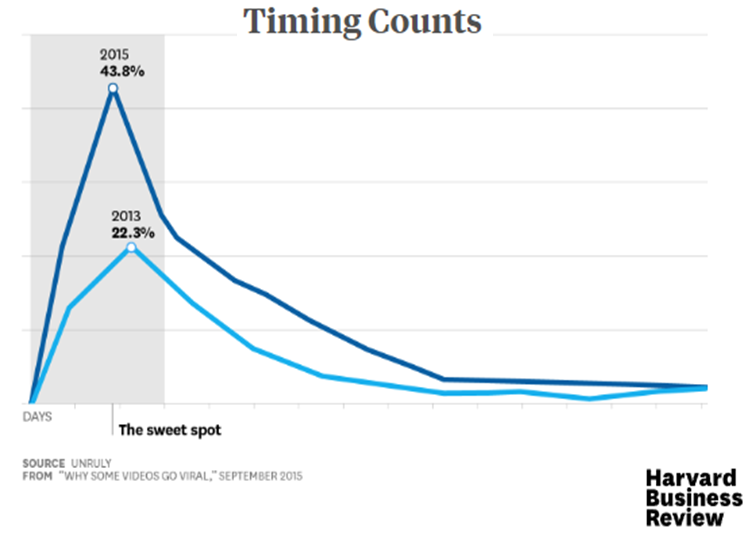

In [140]:
# Create dataframe grouping by Song Title and Days Since Debut.
by_song = no_orig.groupby(['Song Title', 'Days Since Debut']).sum('Engagement').reset_index()

In [141]:
import plotly.express as px
# Plot Engagement over trend duration by Song Title.
fig = px.line(by_song, x = "Days Since Debut", y = "Engagement", 
              title = 'Engagement over Song Usage',
              color = 'Song Title',
             width = 1000,
             height = 400)
fig.show()

In [142]:
# Re-plot limiting engagement to 10M. 
fig = px.line(by_song[by_song['Engagement'] <= 10000000], x = "Days Since Debut", y = "Engagement", 
              title = 'Engagement over Song Usage',
              color = 'Song Title',
             width = 1000,
             height = 400)
fig.show()

In [145]:
# Plot Engagement over trend duration.
fig = px.scatter(by_song[by_song['Engagement'] <= 10000000], 
                 x = "Days Since Debut", 
                 y = "Engagement", 
                 trendline = "expanding", 
                 #trendline_options = dict(window = 10),
                 trendline_color_override = 'red',
                 title="Engagement Over Trend Lifecycle")
fig.show()

# Next Steps, Further Questions
Engagement over song usage period seemingly resembles the previous research. But, can it be predicted with greater accuracy using other modeling methods?

- Attempt SARAMAX or ARIMA modeling.
- Attempt RNN modeling.
- Find a model that will forecast/predict by layering the event timelines.

# Caveats
- More videos certainly exist using each Song/Sound.
- Trend windows are limited by the data collected and will likely shift with the inclusion of a more comprehensive collection.
- Some influence is not captured within the data (presenting in bands of creation/engagement). More features may need to be explored to effectively incorporate this phenomenon (or multiple phenomena) into the models.